<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/ThermalImpedance_SinglePulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Thermal Impedance
</h1></b>

Dr. Bingsen Wang

12/29/2023
</center>

#Transient Thermal Impedance

In most datasheet of power switching devices, there is transient thermal impedance that depends on the pulse duration of the power losses. The concept of transient thermal impedance may be confusing since it seems that the thermal impedance varies as the power loss input changes. This document explains how the time-independent impance corresonds to the so called transient impedance.

The thermal impedance can be characterized with the Foster RC network.

$$Z_{th}(s) = \sum_{i=1}^{n}\frac{R_i}{R_iC_is + 1}\tag{1}$$

Let the time constant $\tau_i$ for the $i^{th}$ RC network be
$$\tau_i = R_iC_i\tag{2}$$

Then the thermal impedance can be rewritten as
$$Z_{th}(s) = \sum_{i=1}^{n}\frac{R_i}{\tau_is + 1}\tag{3}$$

The unit step response of the junction temperature (rise) is
$$T_j(s) = \frac{1}{s}Z_{th}(s) = \sum_{i=1}^{n}\frac{R_i}{\tau_is^2 + s}=\sum_{i=1}^{n}R_i\left(\frac{1}{s}-\frac{1}{s+{1\over\tau_i}}\right)\tag{4}$$

The transient junction temperature rise in time domain is
$$T_j(t) = \sum_{i=1}^{n}R_i\left(1- e^{-{t\over\tau_i}}\right)\tag{5}$$

The so-called transient thermal impedance essentially takes the junction temperature in response to unit step input as the impedance!

#Python Code
The Python code illustrates the real and reactive powers.

[0.01206212 0.01241464 0.01277778 0.01315172 0.01353665 0.01393277
 0.01434026 0.01475934 0.01519022 0.01563311 0.01608826 0.0165559
 0.0170363  0.01752975 0.01803652 0.01855694 0.01909134 0.01964007
 0.02020352 0.02078207 0.02137615 0.0219862  0.02261267 0.02325603
 0.02391678 0.0245954  0.0252924  0.02600827 0.02674351 0.02749861
 0.02827403 0.02907021 0.02988757 0.03072647 0.03158724 0.03247015
 0.03337543 0.03430321 0.03525359 0.03622658 0.0372221  0.03824002
 0.03928012 0.04034209 0.04142557 0.04253011 0.04365519 0.04480024
 0.04596463 0.04714768 0.04834868 0.04956689 0.05080156 0.05205194
 0.05331729 0.0545969  0.05589012 0.05719634 0.05851508 0.0598459
 0.06118854 0.06254286 0.06390886 0.06528675 0.06667691 0.06807996
 0.06949672 0.07092826 0.07237587 0.07384111 0.07532577 0.07683191
 0.0783618  0.07991794 0.08150305 0.08312002 0.08477194 0.086462
 0.08819355 0.08996997 0.09179474 0.09367134 0.09560324 0.09759389
 0.09964665 0.10176484 0.10395163 0.10621011 0.10854323 0.11095379

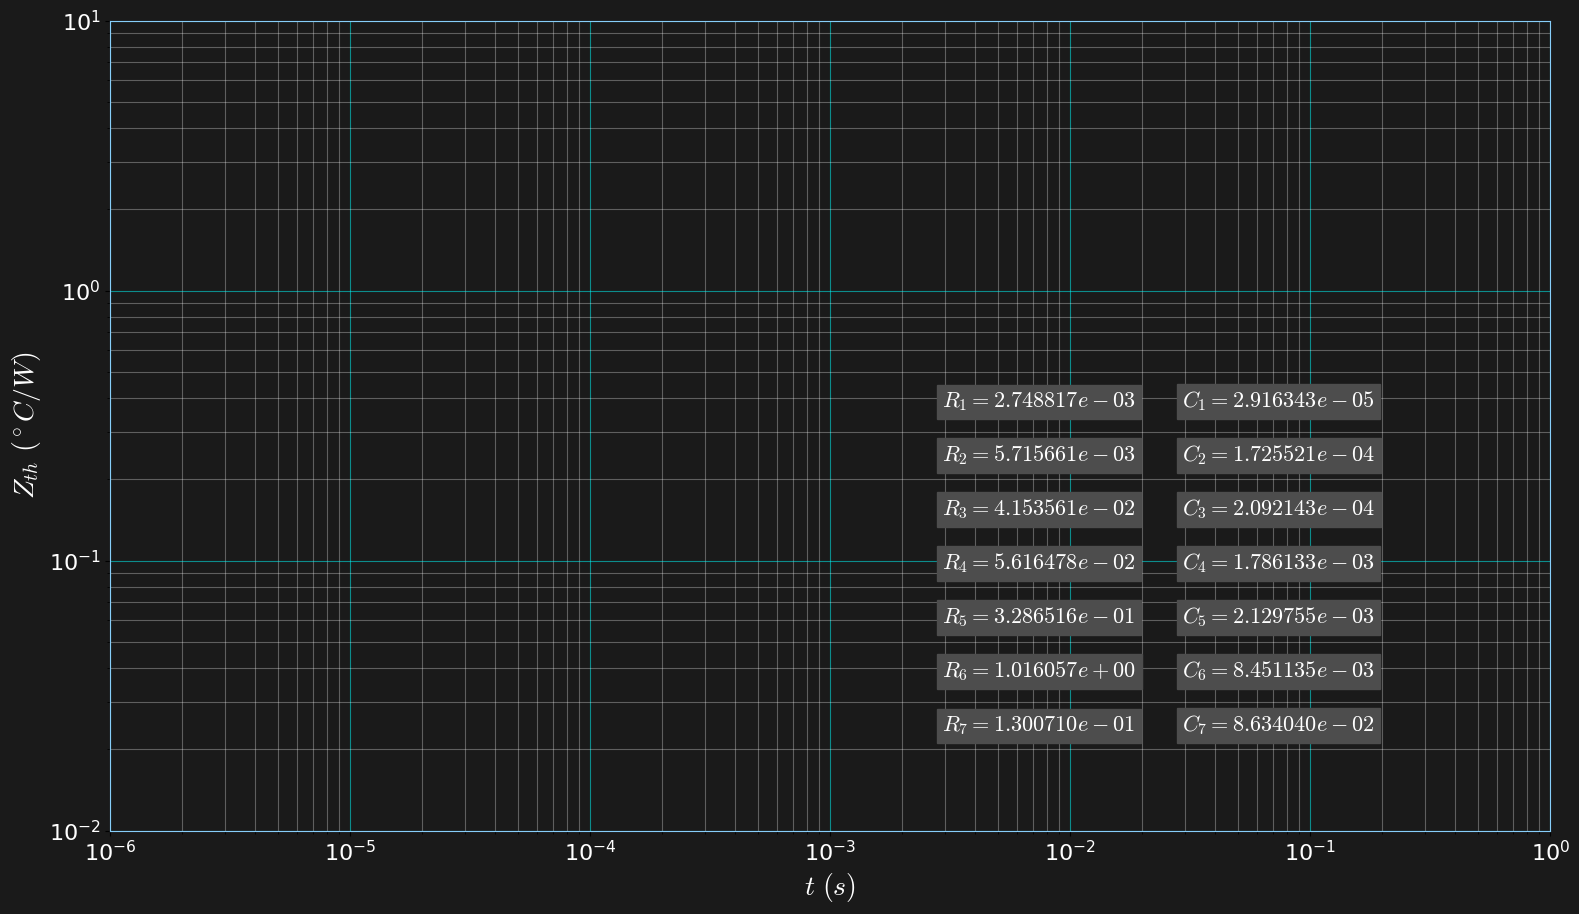

In [97]:
import matplotlib
from os import linesep
from numpy import logspace,exp,log
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def Tj(t,Rs,Cs):
  T=0
  for i,R in enumerate(Rs):
    tau = R*Cs[i]
    T += R*(1-exp(-t/tau))
  return T

#parameters
clst=['lightskyblue','violet','aqua','cornflowerblue','yellow','w',(.1,.1,.1)] #colors dark bg
# clst=['mediumblue','m','brown','c','r',(.1,.1,.1),'w'] #colors light bg
Nf = 300
t=logspace(-6,0,Nf)
# print(t)

#RC network
R_lst = [2.748817E-03, 5.715661E-03, 4.153561E-02, 5.616478E-02,
         0.3286516, 1.016057, 0.130071]
C_lst = [2.916343E-05, 1.725521E-04, 2.092143E-04, 1.786133E-03,
         2.129755E-03, 8.451135E-03, 0.0863404]
Zth = Tj(t,R_lst,C_lst)
# print(Zth)
# print(R_lst[0])
fig = plt.figure(figsize=(16,9),facecolor=clst[-1])
# fig = plt.figure(figsize=(16,9))
# fig.tight_layout()
ax_frame = [[0.08, .08, .9, .9], [1e-6,1], [1e-2,10],
            ]# [pos-boundary, xlim, ylim] for subplots 16:9

ax=fig.add_axes(ax_frame[0],xlim=ax_frame[1], ylim=ax_frame[2],fc='none') #no face color
ax1=fig.add_axes([.6,.1,.3,.5],xlim=[0,1], ylim=[0,1],fc=(.3,.3,.3)) #no face color
ax1.axis('off')
ax1.patch.set_visible(True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$t\ (s)$',size=20,color=clst[-2])
ax.set_ylabel(r'$Z_{th}\ (^\circ C/W)$',size=20,color=clst[-2])
ax.tick_params(labelcolor=clst[-2],labelsize=16)
ax.grid(True,which='major',color=clst[2], alpha=0.5)
ax.grid(True,which='minor',color=clst[-2], alpha=0.3)

ax.minorticks_on()
for spine in ax.spines.values():
  spine.set_edgecolor(clst[0])
line_Zth = ax.plot([],[],color=clst[1],lw=4)[0]
for i in range(len(R_lst)):
  ax1.text(0,.9-.12*i,'$R_'+str(i+1)+'='+str('{:e}'.format(R_lst[i]))+'$',color=clst[-2],size=16,backgroundcolor=(.3,.3,.3))
for i in range(len(C_lst)):
  ax1.text(0.5,.9-.12*i,'$C_'+str(i+1)+'='+str('{:e}'.format(C_lst[i]))+'$',color=clst[-2],size=16,backgroundcolor=(.3,.3,.3))
# animation function. This is called sequentially
def animate(i):
  line_Zth.set_data(t[:i+1],Zth[:i+1])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "ThermalImpedance_singleShot.mp4"
writervideo = animation.FFMpegWriter(fps=25)
anim.save(fn, writer=writervideo,dpi = 120)

#debug
# print(len(trajrec[0]))